In [4]:
from pix2code.model.classes.dataset.Dataset import Dataset
# analysis data using tensorboard

# dataPath = "pix2code/datasets/pix2code_datasets/web/all_data"
dataPath = "dataGenerator/data/dsl/"
dataset = Dataset()
dataset.load(dataPath, generate_binary_sequences=True)

Loading data...
Generating sparse vectors...
Dataset size: 177550
Vocabulary size: 20
Input shape: (256, 256, 3)
Output size: 20


In [5]:
import numpy as np

In [6]:
dic = dict()
for i, tok in enumerate(dataset.next_words):
    if dataset.ids[i] not in dic:
        dic[dataset.ids[i]] = tok.copy()
    else:
        dic[dataset.ids[i]] += tok
    # print(dataset.voc.token_lookup[np.argmax(tok)])

In [7]:
labelCountMean = np.mean(np.array([v for v in dic.values()]), axis=0)
print(labelCountMean)

[ 1.          1.          0.          1.          7.63933333 19.93133333
  1.51666667  7.63933333  1.98666667  0.65666667  1.13766667  4.34066667
  1.15666667  1.159       1.15466667  1.52766667  1.324       1.15866667
  1.18233333  2.672     ]


In [8]:
import matplotlib.pyplot as plt

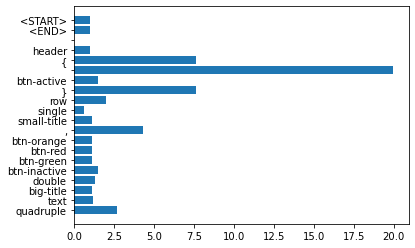

In [9]:
plt.barh(list(dataset.voc.token_lookup.values())[::-1], labelCountMean[::-1])
plt.show()


In [ ]:
# # javascript html 객체 중심 좌표
# # https://stackoverflow.com/questions/442404/retrieve-the-position-x-y-of-an-html-element
# from pix2code.compiler.classes.Compiler import *
# from pix2code.compiler.classes.Utils import *
# from pix2code.compiler.classes.DSLMapper import DSLMapper
# from pix2code.compiler.web_compiler import render_content_with_text

# dsl_path = 'pix2code/compiler/assets/class-group.json'
# dsl_mapper = DSLMapper(dsl_path)
# compiler = Compiler(dsl_mapper.get_dsl_mapping())

# for i, name in enumerate(dataset.ids):
#     dsl = f'{dataPath}/{name}.gui'
#     html = f'{dataPath}/{name}.html'
#     compiler.compile(dsl, html, rendering_function=render_content_with_text)


In [ ]:
print(dataset.ids)

# 중심 좌표

In [4]:
from posixpath import abspath
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
import time, os, tqdm

driver = webdriver.Chrome()

def getCenterPosition(driver, element):
    location = element.location
    size = element.size
    return (location['x'] + size['width'] / 2, location['y'] + size['height'] / 2)

htmls = [f for f in os.listdir(dataPath) if f.endswith('.html')]
# 태그별 중심 좌표 수집
centerPosData = dict()
for i, name in enumerate(htmls):
    html = os.path.join(dataPath, name)
    driver.get(abspath(html))
    time.sleep(0.1)
    
    # retrive center position
    elements = driver.find_elements(By.XPATH, '//*')
    for element in elements:
        center = getCenterPosition(driver, element)
        if center==(0, 0):
            continue
        if element.tag_name not in centerPosData:
            centerPosData[element.tag_name] = [center]
        else:
            centerPosData[element.tag_name].append(center)
        # print(element.tag_name, getCenterPosition(driver, element))
    # break
driver.close()

KeyboardInterrupt: 

In [15]:
import json
with open('centerPosDataGen.json', 'w') as f:
    json.dump(centerPosData, f)

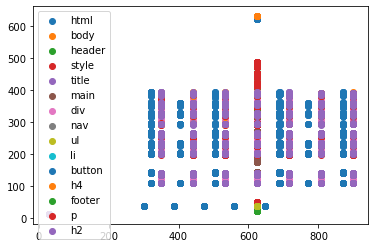

In [16]:
import json
with open('centerPosDataGen.json', 'r') as f:
    centerPosData_ = json.load(f)

# 태그별 중심 좌표 분포
import matplotlib.pyplot as plt
import numpy as np

for tag, pos in centerPosData_.items():
    pos = np.array(pos)
    plt.scatter(pos[:, 0], pos[:, 1], label=tag)
plt.legend()
plt.show()


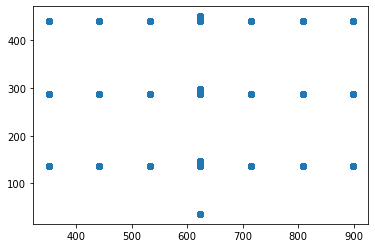

In [15]:
plt.scatter(*zip(*centerPosData['div']))

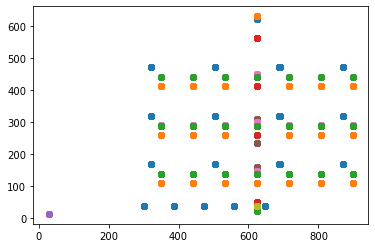

In [17]:
for posData in centerPosData:
    plt.scatter(*zip(*centerPosData[posData]))
plt.show()

# 크기

In [1]:
dataPath = "dataGenerator/data/dsl/"

In [14]:
from posixpath import abspath
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
import time, os, tqdm

driver = webdriver.Chrome()

def gerElementSize(driver, element):
    size = element.size
    return size['width']*size['height']

htmls = [f for f in os.listdir(dataPath) if f.endswith('.html')]
# 태그별 크기 정보 수집
sizeData = dict()
for i, name in enumerate(htmls):
    html = os.path.join(dataPath, name)
    driver.get(abspath(html))
    time.sleep(0.1)
    
    # retrive center position
    elements = driver.find_elements(By.XPATH, '//*')
    for element in elements:
        size = gerElementSize(driver, element)
        if size==(0, 0):
            continue
        if element.tag_name not in sizeData:
            sizeData[element.tag_name] = {size:1}
        else:
            if size not in sizeData[element.tag_name]:
                sizeData[element.tag_name][size] = 1
            else:
                sizeData[element.tag_name][size] += 1
    if i==10:
        break

driver.close()

del(sizeData['html'])
del(sizeData['style'])
del(sizeData['body'])
del(sizeData['main'])
del(sizeData['nav'])
print(sizeData)
# bubble chart
import matplotlib.pyplot as plt
import numpy as np

# x축 : 태그, y축 : 크기, z축 : 개수
for tag, size in sizeData.items():
    x = [tag]*len(size)
    y = list(size.keys())
    z = list(size.values())
    plt.scatter(x, y, s=z, label=tag)
# plt.legend()
plt.show()


KeyboardInterrupt: 

In [32]:
def colorTagPlot(path):
    colors = {'rgba(51, 51, 51, 1)':'black', 'rgba(59, 130, 246, 1)':'blue', 'rgba(245, 245, 245, 1)':'white', 'rgba(249, 115, 22, 1)':'orange', 'rgba(239, 68, 68, 1)':'red', 'rgba(34, 197, 94, 1)':'green'}
    driver = webdriver.Chrome()
    htmls = [f for f in os.listdir(dataPath) if f.endswith('.html')]
    # 태그별 배경 색 정보 수집
    colorData = dict()
    for i, name in enumerate(htmls):
        html = os.path.join(dataPath, name)
        driver.get(abspath(html))
        time.sleep(0.1)
        
        # retrive center position
        elements = driver.find_elements(By.XPATH, '//*')
        for element in elements:
            color = element.value_of_css_property('background-color')
            if color=='rgba(0, 0, 0, 0)':
                continue
            color = colors[color]
            if element.tag_name+color not in colorData:
                colorData[element.tag_name+color] = 1
            else:
                colorData[element.tag_name+color] += 1
        if i==10:
            break
    driver.close()

    # 바 차트
    import matplotlib.pyplot as plt
    import numpy as np

    # x축 : 태그+색, y축 : 개수
    plt.bar(colorData.keys(), colorData.values())
    plt.show()

    return colorData

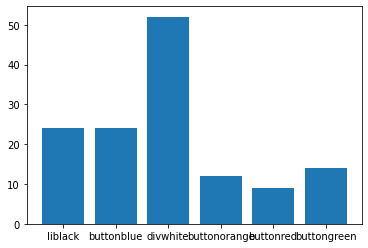

In [33]:
colorData = colorTagPlot(dataPath)

In [29]:
print(colorData)

{'lirgba(51, 51, 51, 1)': 24, 'buttonrgba(59, 130, 246, 1)': 24, 'divrgba(245, 245, 245, 1)': 52, 'buttonrgba(249, 115, 22, 1)': 12, 'buttonrgba(239, 68, 68, 1)': 9, 'buttonrgba(34, 197, 94, 1)': 14}
